<a href="https://colab.research.google.com/github/abhishek-marathe04/learning-pytorch/blob/main/handwritten_digit_recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import required libs

import torch
from torch import nn

# Import torch vision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib
import matplotlib.pyplot as plt

# check versions
print(torch.__version__)
print(torchvision.__version__)

2.9.0+cpu
0.24.0+cpu


In [2]:
from numpy import test
train_data = datasets.MNIST(root="data",
                            train=True,
                            transform=ToTensor(),
                            download=True,
                            target_transform=None)

test_data = datasets.MNIST(root="data",
                           train=False,
                           transform=ToTensor(),
                           download=True,
                           target_transform=None
                           )

100%|██████████| 9.91M/9.91M [00:00<00:00, 36.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.14MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.75MB/s]


In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [6]:
class_names = train_data.classes

In [7]:
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [9]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [10]:
# Check the shape of an image
print(f"Image is of {image.shape} shape")
print(f" Lable is {class_names[label]}")

Image is of torch.Size([1, 28, 28]) shape
 Lable is 5 - five


(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

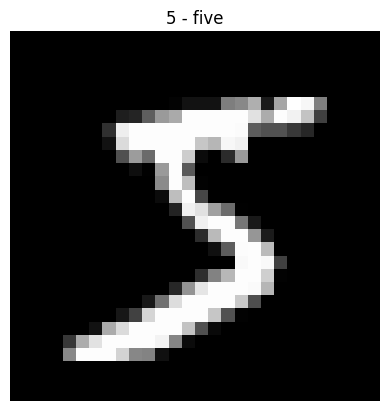

In [11]:
# Visualising our data
import matplotlib.pyplot as plt

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

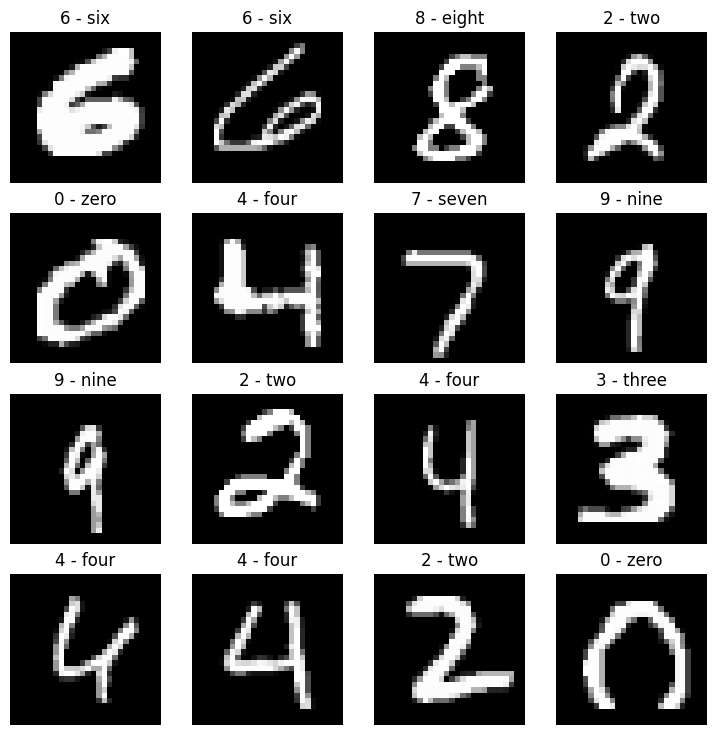

In [12]:
# Visualize random samples
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4


for i in range(1, rows * cols + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  random_image, random_label = train_data[random_idx]

  fig.add_subplot(rows, cols, i)
  plt.imshow(random_image.squeeze(), cmap="gray")
  plt.title(class_names[random_label])
  plt.axis(False)

Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradients per epoch.

In [13]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

In [14]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x784fa66b3d40>,
 <torch.utils.data.dataloader.DataLoader at 0x784fa66b27e0>)

In [15]:
# Let's check out what what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x784fa66b3d40>, <torch.utils.data.dataloader.DataLoader object at 0x784fa66b27e0>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [16]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
test_features_batch, test_labels_batch = next(iter(test_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

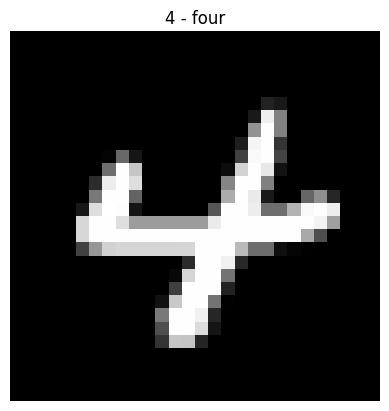

In [17]:
# Visulize one sample from train features batch

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
random_image = train_features_batch[random_idx]
random_label = train_labels_batch[random_idx]

fig.add_subplot(rows, cols, i)
plt.imshow(random_image.squeeze(), cmap="gray")
plt.title(class_names[random_label])
plt.axis(False)

In [18]:
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [19]:
# Helper functions for train and test
def train_step(model: torch.nn.Module,
               train_dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  ### Training
  train_loss, train_acc = 0, 0

  # And a loop to loop though the training batches
  for batch, (X, y) in enumerate(train_dataloader):

    X = X.to(device)
    y = y.to(device)
    model.train()

    # FOrward
    y_pred = model(X)

    # Train loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # Train accuracy
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # Optimiser zero grad
    optimizer.zero_grad()

    # Loss backword
    loss.backward()

    # Optimiser step
    optimizer.step()

    # Print out whats happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")


  # Divide total train loss by length of train data loader
  train_loss /= len(train_dataloader)

  # Calculate the test acc average per batch
  train_acc /=len(train_dataloader)

  print(f"Test loss {train_loss:.4f}, Train acc: {train_acc:.4f}")



In [20]:
def test_step(model: torch.nn.Module,
               test_dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):

  ### Testing
  test_loss, test_acc = 0,  0
  model.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:

      X_test = X_test.to(device)
      y_test = y_test.to(device)
      test_pred = model(X_test)

      # Test loss
      loss = loss_fn(test_pred, y_test)
      test_loss += loss

      # Test accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))


    # Calculate the test loss average per batch
    test_loss /=len(test_dataloader)

    # Calculate the test acc average per batch
    test_acc /=len(test_dataloader)

  print(f"Test loss {test_loss:.4f}, Test acc: {test_acc:.4f}")



In [21]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """ Returns a dictionary containing the results the model predicting on data loader. """
  loss, acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X, y in tqdm(data_loader):

      X = X.to(device)
      y = y.to(device)
      # Make predictions
      y_pred = model(X)

      # Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # Scale loss and acc to find avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc }

## Building a Convolutional Neural Network (CNN)

CNN's are also known ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

To find out what's happening inside a CNN, see this website: https://poloclub.github.io/cnn-explainer/

In [22]:
class MNISTModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_layer_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  padding=1,
                  kernel_size=3,
                  stride=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
          out_channels=hidden_units,
          padding=1,
          kernel_size=3,
          stride=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_layer_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  padding=1,
                  kernel_size=3,
                  stride=1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
          out_channels=hidden_units,
          padding=1,
          kernel_size=3,
          stride=1
        ),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.classification_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 7 * 7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_layer_1(x)
    # print(f"Shape of x after conv layer 1 {x.shape}")
    x = self.conv_layer_2(x)
    # print(f"Shape of x after conv layer 2 {x.shape}")
    x = self.classification_layer(x)
    # print(f"Shape of x after classification_layer  {x.shape}")
    return x

In [23]:
model_0 = MNISTModelV0(input_shape=1,
                       hidden_units=10,
                       output_shape=len(class_names)).to(device)
model_0

MNISTModelV0(
  (conv_layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [24]:
# Lets test out model before training
random_image.shape

torch.Size([1, 28, 28])

In [25]:
model_0(random_image.unsqueeze(0).to(device))

tensor([[ 0.0326, -0.0662,  0.0543, -0.0346, -0.0058,  0.0113, -0.0022, -0.0099,
          0.0175,  0.0120]], grad_fn=<AddmmBackward0>)

In [26]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [27]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs

In [28]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

### 7.4 Training and testing `model_2` using our training and test functions

In [29]:
from tqdm import tqdm
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_0 = timer()

# Train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n ---")

  train_step(model=model_0,
             train_dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_0,
             test_dataloader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
            optimizer=optimizer,
             device=device)

  train_time_end_model_0 = timer()
  total_train_time_model_0 = print_train_time(start=train_time_start_model_0,
                                              end=train_time_end_model_0,
                                              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 
 ---
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Test loss 0.3356, Train acc: 88.7417


 33%|███▎      | 1/3 [01:01<02:03, 61.72s/it]

Test loss 0.0736, Test acc: 97.7137
Train time on cpu: 61.725 seconds
Epoch: 1 
 ---
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Test loss 0.0821, Train acc: 97.4950


 67%|██████▋   | 2/3 [02:01<01:00, 60.63s/it]

Test loss 0.0535, Test acc: 98.2927
Train time on cpu: 121.598 seconds
Epoch: 2 
 ---
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Test loss 0.0658, Train acc: 97.9733


100%|██████████| 3/3 [02:59<00:00, 59.88s/it]

Test loss 0.0566, Test acc: 98.2228
Train time on cpu: 179.649 seconds


In [30]:
# Get model_2 Results
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

100%|██████████| 313/313 [00:04<00:00, 78.00it/s]


{'model_name': 'MNISTModelV0',
 'model_loss': 0.05670509859919548,
 'model_acc': 98.22284345047923}

In [31]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):

  pred_probs = []
  model.to(device)

  model.eval()

  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimenstion and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      #Forward pass
      pred_logit = model(sample)

      # Get predictions probablity (logits -> Predictions probablity)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob)

  # Stach the pred probs to turn list into a tensor
  return torch.stack(pred_probs)

In [32]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)


# View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

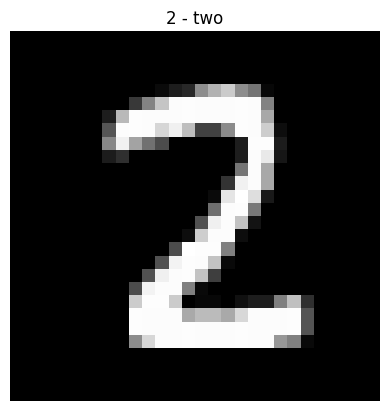

In [33]:
# View first sample
plt.imshow(test_samples[0].squeeze(), cmap="grey")
plt.title(class_names[test_labels[0]])
plt.axis(False)

In [34]:
# Make predictions

pred_probs = make_predictions(model=model_0,
                              data=test_samples)

# View the first two predcs
pred_probs[:2]

tensor([[3.0917e-11, 1.7314e-06, 1.0000e+00, 8.7696e-08, 3.8930e-14, 1.9631e-15,
         2.0502e-13, 1.4161e-08, 2.6381e-06, 1.4677e-10],
        [5.7498e-09, 9.9961e-01, 1.0036e-06, 7.9291e-08, 3.5479e-06, 1.1205e-04,
         1.1025e-04, 1.6557e-06, 1.1219e-04, 5.0655e-05]])

In [35]:
# COnvert pred probs to lables
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

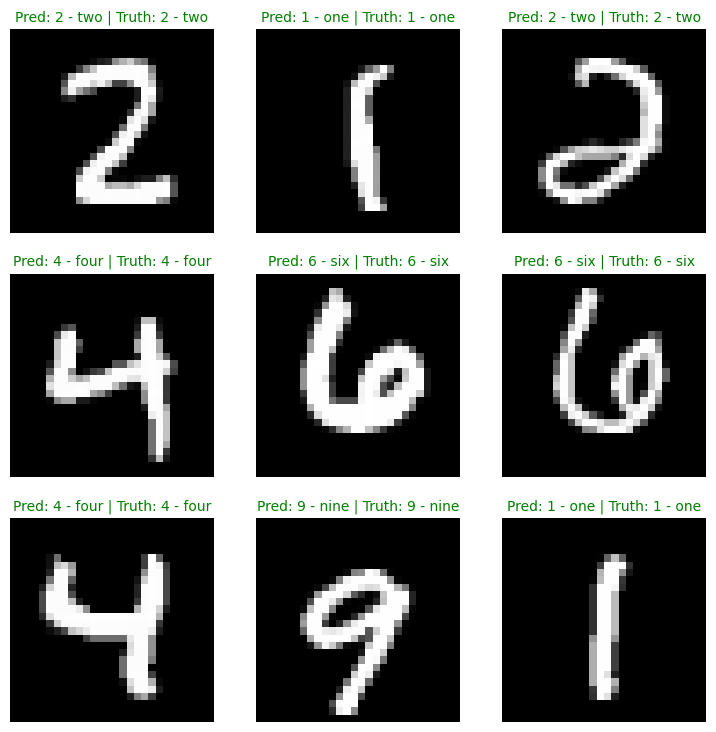

In [36]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):

  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);

Image size: torch.Size([1, 28, 28])
Label: 5, label size: torch.Size([])


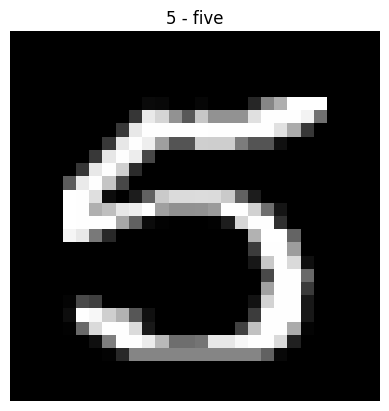

In [37]:
# Take sample Test image

# Show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(test_features_batch), size=[1]).item()
test_img, test_label = test_features_batch[random_idx], test_labels_batch[random_idx]
plt.imshow(test_img.squeeze(), cmap="grey")
plt.title(class_names[test_label])
plt.axis(False)
print(f"Image size: {test_img.shape}")
print(f"Label: {test_label}, label size: {test_label.shape}")

In [38]:
output = model_0(test_img.unsqueeze(0).to(device))
print(class_names[torch.argmax(output)])

5 - five


In [39]:

# Saving our pytorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "handwritten_digit_recogniser.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to : models/handwritten_digit_recogniser.pth


In [40]:
# Load model from state dict

model_from_mem = MNISTModelV0(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)

In [41]:
model_from_mem.load_state_dict(torch.load(MODEL_SAVE_PATH, weights_only=False))

<All keys matched successfully>

Image size: torch.Size([1, 28, 28])
Label: 2, label size: torch.Size([])


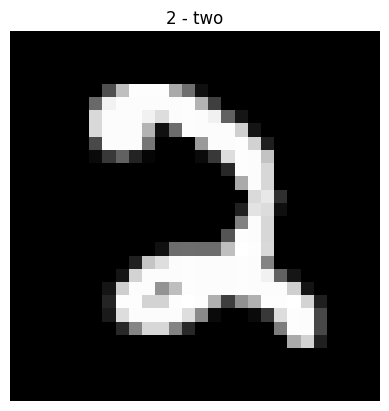

In [42]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(test_features_batch), size=[1]).item()
test_img, test_label = test_features_batch[random_idx], test_labels_batch[random_idx]
plt.imshow(test_img.squeeze(), cmap="grey")
plt.title(class_names[test_label])
plt.axis(False)
print(f"Image size: {test_img.shape}")
print(f"Label: {test_label}, label size: {test_label.shape}")

In [47]:
model_from_mem.eval()
  #Forward pass
with torch.no_grad():
  pred_logit = model_from_mem(test_img.unsqueeze(0))

  # Get predictions probablity (logits -> Predictions probablity)
  pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
  probs_np = pred_prob.squeeze().cpu().numpy()
  pred_label = class_names[torch.argmax(pred_prob)]
  confidence = probs_np[torch.argmax(pred_prob)] * 100

pred_label

tensor([2.8849e-08, 1.5681e-08, 1.0000e+00, 2.2796e-07, 2.4676e-10, 1.5439e-09,
        2.2470e-11, 1.5231e-06, 9.4266e-07, 3.5954e-08])
[2.8849021e-08 1.5680575e-08 9.9999726e-01 2.2796104e-07 2.4675759e-10
 1.5438846e-09 2.2470263e-11 1.5230854e-06 9.4266176e-07 3.5954240e-08]
99.999725


'2 - two'